In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as plt

def extract(page):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}
    url = f'https://www.indeed.com/jobs?q=data%20scientist&l=CO&start={page}&vjk=10ffcb6d107cbd0a'
    r = requests.get(url, headers)
    soup = BeautifulSoup(r.content, 'html.parser')
    return soup


def transform(soup):
    divs = soup.find_all('div', class_ = 'cardOutline')
    keywords = ['Python', 'SQL', 'AWS', 'RESTFUL', 'Machine learning', 'Deep Learning', 'Text Mining', 'NLP', 'SAS', 'Tableau', 'Sagemaker', 'TensorFlow', 'Spark']
    for item in divs:
        title = item.find('a').text
        company = item.find('span', class_ ='companyName').text
        location = item.find('div', class_='companyLocation').text
        summary = item.find('table', class_ = 'jobCardShelfContainer big6_visualChanges').text
        try:
            rating = item.find('span',class_='ratingNumber').text
        except:
            rating = np.nan

                
        
         

        job = {
            'Title': title,
            'Company': company,
            'Location': location,
            'Summary': summary.replace('\n',""),
            'Rating': float(rating)
            
        }
        joblist.append(job)
    return


joblist = []
for i in range(0,200,10):
    print(f'Getting page, {i}')
    c = extract(0)
    transform(c)

df = pd.DataFrame(joblist)

print(df.head())


Getting page, 0
Getting page, 10
Getting page, 20
Getting page, 30
Getting page, 40
Getting page, 50
Getting page, 60
Getting page, 70
Getting page, 80
Getting page, 90
Getting page, 100
Getting page, 110
Getting page, 120
Getting page, 130
Getting page, 140
Getting page, 150
Getting page, 160
Getting page, 170
Getting page, 180
Getting page, 190
                                       Title                    Company  \
0  Data Scientist III (Remote Work Eligible)  Sierra Nevada Corporation   
1                    Data Scientist (Junior)                       BDSA   
2                             Data Scientist                       Visa   
3   Staff Data Scientist, Virtual HQ - Slack                 Salesforce   
4                    Data Scientist I - NEON                   Battelle   

                        Location  \
0  Remote in Englewood, CO 80113   
1       Remote in Louisville, CO   
2            Highlands Ranch, CO   
3    Hybrid remote in Denver, CO   
4              Bould

In [2]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,"Remote in Englewood, CO 80113",The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,"Remote in Louisville, CO","For example, combining public weather data wit...",NaN
2,Data Scientist,Visa,"Highlands Ranch, CO",Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,"Hybrid remote in Denver, CO",Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,"Boulder, CO 80301",A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.","Remote in Denver, CO",Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,"Aurora, CO+2 locations","Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,"Denver, CO","Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,"Hybrid remote in Denver, CO",Easily applyResponsive employerUrgently hiring...,3.6


In [3]:
df.dtypes

Title        object
Company      object
Location     object
Summary      object
Rating      float64
dtype: object

In [4]:
df.isnull().sum()

Title        0
Company      0
Location     0
Summary      0
Rating      83
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     300 non-null    object 
 1   Company   300 non-null    object 
 2   Location  300 non-null    object 
 3   Summary   300 non-null    object 
 4   Rating    217 non-null    float64
dtypes: float64(1), object(4)
memory usage: 11.8+ KB


In [6]:
df.describe()

,Rating
count,217.000000
mean,3.744240
std,0.317654
min,2.500000
25%,3.500000
50%,3.800000
75%,4.000000
max,4.300000


In [7]:
df.shape

(300, 5)

In [8]:
df.drop_duplicates()

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,"Remote in Englewood, CO 80113",The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,"Remote in Louisville, CO","For example, combining public weather data wit...",NaN
2,Data Scientist,Visa,"Highlands Ranch, CO",Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,"Hybrid remote in Denver, CO",Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,"Boulder, CO 80301",A 30+ year project dedicated to understanding ...,3.8
5,"Front End Engineer, MADS- Measurement and Data...",Amazon.com Services LLC,"Boulder, CO",In this role you will partner with product lea...,3.5
6,Data Scientist,"City of Grand Junction, Colorado","Grand Junction, CO 81506",The successful candidate will be proficient wi...,NaN
7,Geospatial Data Scientist,Perennial,"Remote in Boulder, CO+1 location",Easily applyExperience applying machine learni...,NaN
8,Credit Strategy Analyst - Data Scientist,Funding Circle US,"Denver, CO 80202 (Central Business District area)",Provide insights and recommendations managemen...,3.3
9,Data Scientist - Utility Reliability (Jr - Sr)...,E Source,"Hybrid remote in Denver, CO",Easily applyE Source develops groundbreaking d...,4.0


In [9]:
df.shape


(300, 5)

In [29]:
df['Title'].unique()

array(['Data Scientist III (Remote Work Eligible)',
       'Data Scientist (Junior)', 'Data Scientist',
       'Staff Data Scientist, Virtual HQ - Slack',
       'Data Scientist I - NEON',
       'Front End Engineer, MADS- Measurement and Data Science',
       'Geospatial Data Scientist',
       'Credit Strategy Analyst - Data Scientist',
       'Data Scientist - Utility Reliability (Jr - Sr) - REMOTE',
       'Lead Data Scientist', 'Data Scientist – People Analytics',
       'Data Scientist Advanced Analytics', 'Data Science Manager',
       'Senior Data Scientist', 'Data Scientist II',
       'Data Scientist, Associate',
       'Natural Language Processing Specialist'], dtype=object)

In [10]:
df['Location'].unique()

array(['Remote in Englewood, CO 80113', 'Remote in Louisville, CO',
       'Highlands Ranch, CO', 'Hybrid remote in Denver, CO',
       'Boulder, CO 80301', 'Boulder, CO', 'Grand Junction, CO 81506',
       'Remote in Boulder, CO+1 location',
       'Denver, CO 80202 (Central Business District area)',
       'Remote in Denver, CO', 'Aurora, CO+2 locations', 'Denver, CO',
       'Remote in Colorado Springs, CO 80919',
       'Remote in Lone Tree, CO 80124',
       'Colorado Springs, CO 80919 (Northwest Colorado Springs area)',
       'Remote in Colorado', 'Denver, CO+2 locations',
       'Hybrid remote in Colorado Springs, CO 80916',
       'Evergreen, CO 80437'], dtype=object)

In [11]:
df['Location'] = df['Location'].str.split(',').str[0] 

In [12]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote in Englewood,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,Remote in Louisville,"For example, combining public weather data wit...",NaN
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,Hybrid remote in Denver,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",Remote in Denver,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,Hybrid remote in Denver,Easily applyResponsive employerUrgently hiring...,3.6


In [13]:
df['Location'] = df['Location'].str.split('Remote').str[0]

In [14]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,,"For example, combining public weather data wit...",NaN
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,Hybrid remote in Denver,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,Hybrid remote in Denver,Easily applyResponsive employerUrgently hiring...,3.6


In [15]:
df = df.replace(r'^\s*$',np.nan, regex = True)

In [16]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,NaN,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,NaN,"For example, combining public weather data wit...",NaN
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,Hybrid remote in Denver,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",NaN,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,Hybrid remote in Denver,Easily applyResponsive employerUrgently hiring...,3.6


In [17]:
df.Location = df.Location.fillna("Remote")

In [18]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",NaN
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,Hybrid remote in Denver,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",Remote,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,Hybrid remote in Denver,Easily applyResponsive employerUrgently hiring...,3.6


In [19]:
df['Location'] = df['Location'].str.split('Hybrid').str[0]

In [20]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",NaN
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",Remote,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,,Easily applyResponsive employerUrgently hiring...,3.6


In [21]:
df = df.replace(r'^\s*$',np.nan, regex = True)

In [22]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",NaN
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,NaN,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",Remote,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,NaN,Easily applyResponsive employerUrgently hiring...,3.6


In [23]:
df.Location = df.Location.fillna("Hybrid")

In [24]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",NaN
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,Hybrid,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",Remote,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,Hybrid,Easily applyResponsive employerUrgently hiring...,3.6


In [25]:
df['Location'].unique()

array(['Remote', 'Highlands Ranch', 'Hybrid', 'Boulder', 'Grand Junction',
       'Denver', 'Aurora', 'Colorado Springs', 'Evergreen'], dtype=object)

In [26]:
df['Rating'].fillna(value=round(df['Rating'].mean(),1),inplace=True)

In [27]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",3.7
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ - Slack",Salesforce,Hybrid,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I - NEON,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",Remote,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,Hybrid,Easily applyResponsive employerUrgently hiring...,3.6


In [28]:
df.isnull().sum()

Title       0
Company     0
Location    0
Summary     0
Rating      0
dtype: int64

In [30]:
df['Title'] = df['Title'].str.split('-').str[0]

In [31]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",3.7
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,"Staff Data Scientist, Virtual HQ",Salesforce,Hybrid,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",Remote,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,Hybrid,Easily applyResponsive employerUrgently hiring...,3.6


In [32]:
df['Title'] = df['Title'].str.split(',').str[0]

In [33]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III (Remote Work Eligible),Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist (Junior),BDSA,Remote,"For example, combining public weather data wit...",3.7
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,Staff Data Scientist,Salesforce,Hybrid,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",Remote,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,Hybrid,Easily applyResponsive employerUrgently hiring...,3.6


In [34]:
df['Title'] = df['Title'].str.split('(').str[0]

In [35]:
df

,Title,Company,Location,Summary,Rating
0,Data Scientist III,Sierra Nevada Corporation,Remote,The status of applicable COVID-19 vaccination ...,3.6
1,Data Scientist,BDSA,Remote,"For example, combining public weather data wit...",3.7
2,Data Scientist,Visa,Highlands Ranch,Extract and understand data to form an opinion...,3.9
3,Staff Data Scientist,Salesforce,Hybrid,Evangelize evidence-based decision making by p...,4.3
4,Data Scientist I,Battelle,Boulder,A 30+ year project dedicated to understanding ...,3.8
...,...,...,...,...,...
295,Lead Data Scientist,"Zoom Video Communications, Inc.",Remote,Past experience in mentorship of data scientis...,4.1
296,Data Scientist,Booz Allen Hamilton,Aurora,"Experience with applying advanced statistics, ...",3.9
297,Data Scientist – People Analytics,Gensler,Denver,"Strong data visualization skills, and a histor...",3.5
298,Data Scientist,Business Intelli Solutions,Hybrid,Easily applyResponsive employerUrgently hiring...,3.6


In [36]:
df['Title'].unique()

array(['Data Scientist III ', 'Data Scientist ', 'Data Scientist',
       'Staff Data Scientist', 'Data Scientist I ', 'Front End Engineer',
       'Geospatial Data Scientist', 'Credit Strategy Analyst ',
       'Lead Data Scientist', 'Data Scientist – People Analytics',
       'Data Scientist Advanced Analytics', 'Data Science Manager',
       'Senior Data Scientist', 'Data Scientist II',
       'Natural Language Processing Specialist'], dtype=object)

In [37]:
# ----------- PLotting -------------- 

In [38]:
df_company_rating = df[['Company','Rating']]

In [39]:
df_company_rating=  df_company_rating.drop_duplicates()
df_company_rating=df_company_rating.reset_index(drop=True)

<AxesSubplot:xlabel='Company'>

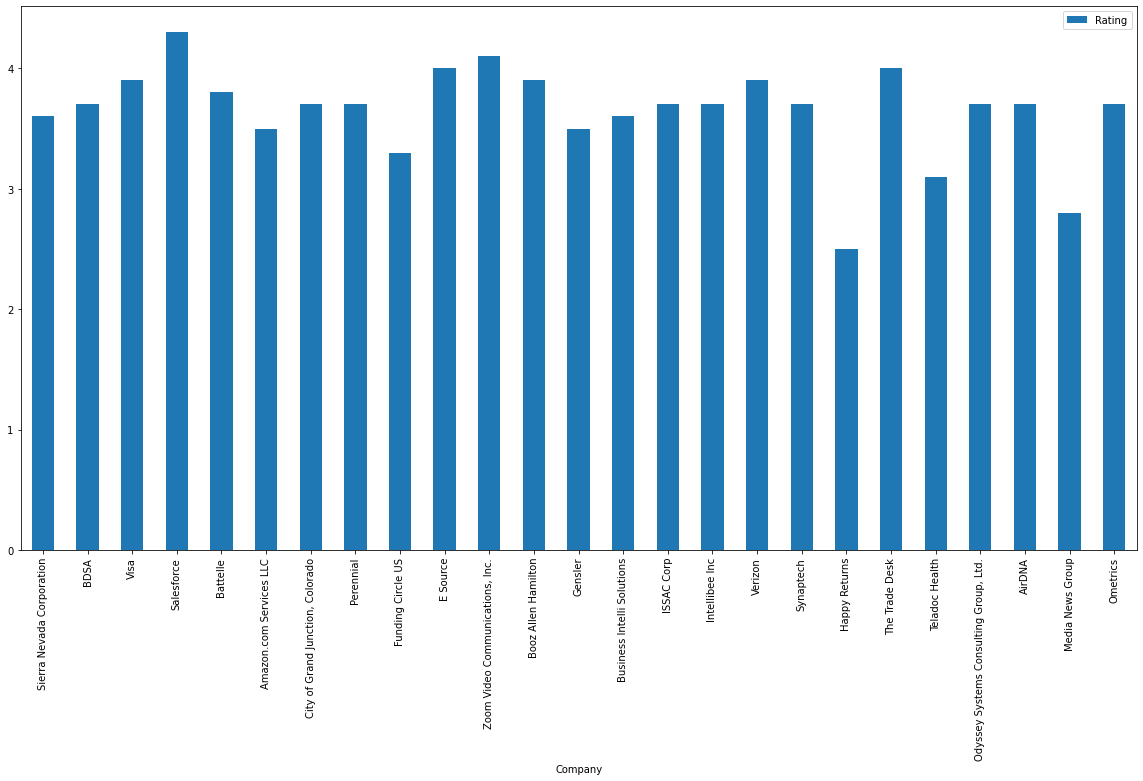

In [40]:
df_company_rating.plot.bar(x='Company', y='Rating', figsize=(20,10))

In [41]:
df_new = pd.DataFrame.from_dict(df.groupby(['Company'])['Company'].count().to_dict(), orient ='index').reset_index()
df_new=df_new.rename(columns={"index":"Company", 0:"Openings"})
df_new

,Company,Openings
0,AirDNA,1
1,Amazon.com Services LLC,17
2,BDSA,20
3,Battelle,20
4,Booz Allen Hamilton,17
5,Business Intelli Solutions,20
6,"City of Grand Junction, Colorado",18
7,E Source,19
8,Funding Circle US,19
9,Gensler,19


<AxesSubplot:xlabel='Company'>

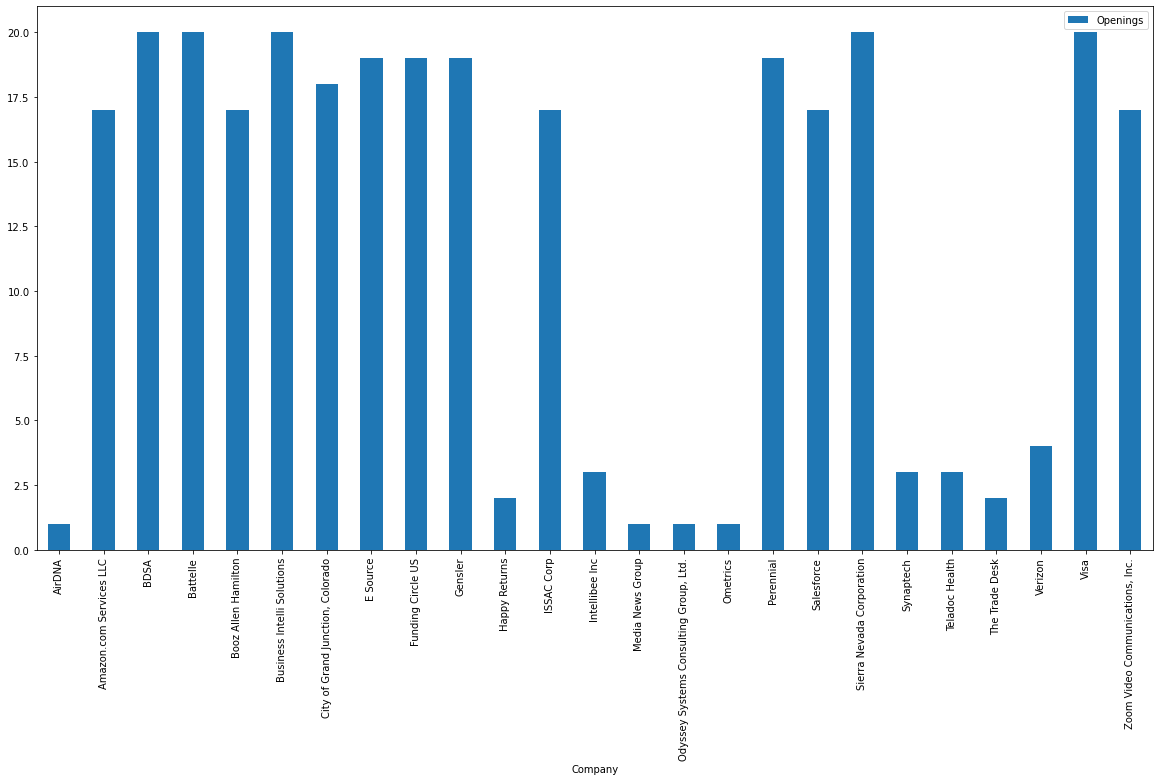

In [42]:
df_new.plot.bar(x='Company', y='Openings', figsize=(20,10))

In [43]:
df_loc_count = pd.DataFrame.from_dict(df.groupby(['Location'])['Location'].count().to_dict(), orient ='index').reset_index()

In [44]:
df_loc_count=df_loc_count.rename(columns={"index":"Location", 0:"Openings"})

<AxesSubplot:xlabel='Location'>

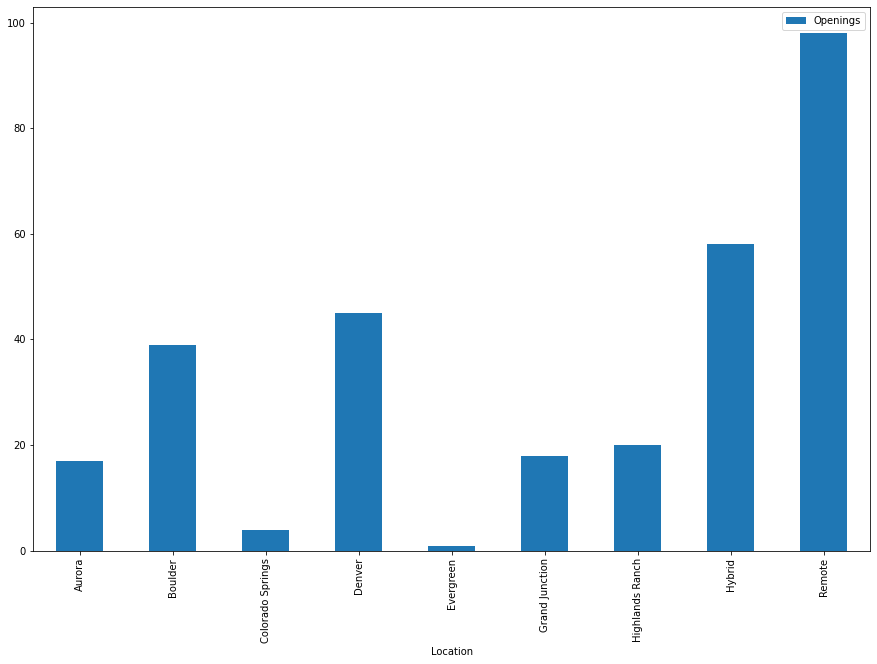

In [45]:
df_loc_count.plot.bar(x='Location', y='Openings', figsize=(15,10))

In [54]:
import matplotlib.pyplot as plt


In [55]:
keywords = ['Python', 'SQL', 'AWS','Qlik', 'RESTFUL', 'Machine learning','ML', 'Deep Learning', 'Text Mining', 'NLP', 'SAS', 'Tableau', 'Sagemaker', 'TensorFlow', 'Spark']
keyword_count = []
for i in keywords:
    count = 0
    for j in df.Summary:
        if i.lower() in j.lower():
            count += 1
    keyword_count.append(count)
print("Top Two Skills are:")
print()
print(keywords[keyword_count.index(max(keyword_count))])
keyword_count[keyword_count.index(max(keyword_count))] = 0
print(keywords[keyword_count.index(max(keyword_count))])
keyword_count[keyword_count.index(max(keyword_count))] = 0
#print(keywords[keyword_count.index(max(keyword_count))])
#keyword_count[keyword_count.index(max(keyword_count))] = 0


Top Two Skills are:

Machine learning
Python


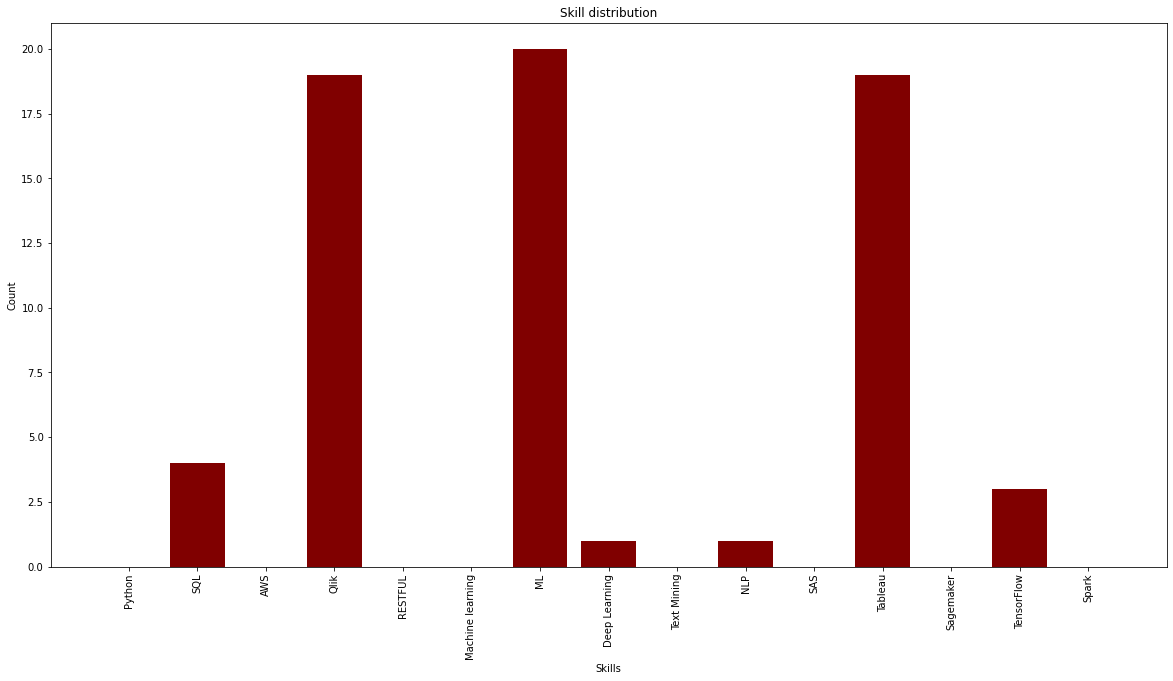

In [56]:
fig = plt.figure(figsize = (20, 10))
 
plt.bar(keywords, keyword_count, color ='maroon')
plt.xticks(rotation=90)
plt.xlabel("Skills")
plt.ylabel("Count")
plt.title("Skill distribution")
plt.show()
